In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [0]:
x = torch.linspace(1,50,50).reshape(-1,1)

In [0]:
error = torch.randint(-5,5,(50,1),dtype=torch.float)

In [0]:
y = 2 * x + 1 + error

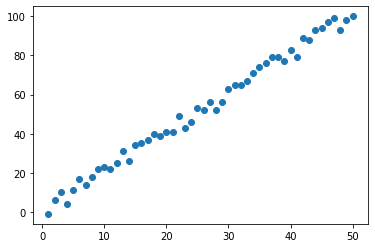

In [5]:
plt.scatter(x.numpy(),y.numpy())

In [0]:
class Model(nn.Module):

  def __init__(self,in_features,out_features):
    super().__init__()
    self.linear = nn.Linear(in_features,out_features)

  def forward(self, x):
     y_pred = self.linear(x)
     return y_pred

In [0]:
model = Model(1,1)

In [8]:
for name,params in model.named_parameters():
  print(name,'\t',params)

linear.weight 	 Parameter containing:
tensor([[0.9685]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([0.4459], requires_grad=True)


In [0]:
criterion = nn.MSELoss()

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [11]:
epochs = 20
losses = []

for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred,y)
  losses.append(loss)
  print(f'epoch {i+1} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 1 loss: 992.3822631835938 weight: 0.968518853187561 bias: 0.44589996337890625
epoch 2 loss: 515.878173828125 weight: 2.807711124420166 bias: 0.5008537173271179
epoch 3 loss: 269.8761291503906 weight: 1.4862074851989746 bias: 0.4618987441062927
epoch 4 loss: 142.87403869628906 weight: 2.4357125759124756 bias: 0.49041837453842163
epoch 5 loss: 77.30730438232422 weight: 1.7534626722335815 bias: 0.47045621275901794
epoch 6 loss: 43.45747375488281 weight: 2.2436540126800537 bias: 0.48532870411872864
epoch 7 loss: 25.98194694519043 weight: 1.8914283514022827 bias: 0.47517168521881104
epoch 8 loss: 16.95994758605957 weight: 2.1444921493530273 bias: 0.48299849033355713
epoch 9 loss: 12.302146911621094 weight: 1.9626461267471313 bias: 0.4779033958911896
epoch 10 loss: 9.897449493408203 weight: 2.093289613723755 bias: 0.48209264874458313
epoch 11 loss: 8.655938148498535 weight: 1.9994045495986938 bias: 0.4796106815338135
epoch 12 loss: 8.014934539794922 weight: 2.0668466091156006 bias: 0.4

In [0]:
xtest = torch.linspace(1.0,50.0,50)
weight = model.linear.weight.item()
bias = model.linear.bias.item()
predicted_y = weight * xtest + bias

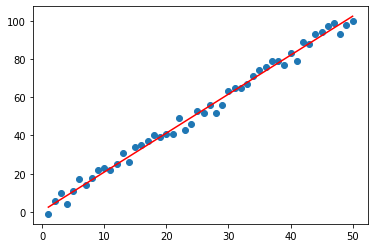

In [13]:
plt.scatter(x.numpy(),y.numpy())
plt.plot(xtest.numpy(),predicted_y.numpy(),'r')